## Лабораторная работа №1 | Вариант 5

Выполнил: Шамбилов Руслан

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [4]:
matrix = np.eye(3)

print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [7]:
dt = np.dtype([('r', np.uint8), ('g', np.uint8), ('b', np.uint8), ('a', np.uint8)])

colors = np.array([(255, 0, 0, 1),   
                   (0, 255, 0, 1),   
                   (0, 0, 255, 1)],  
                  dtype=dt)

print(colors)


[(255,   0,   0, 1) (  0, 255,   0, 1) (  0,   0, 255, 1)]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [9]:
np.seterr(all='ignore')

result = np.array([1, 2, 3]) / 0  
print(result)

[inf inf inf]


4. Создайте случайный вектор размера 10 и отсортируйте его

In [11]:
random_vector = np.random.rand(10)

sorted_vector = np.sort(random_vector)

print(random_vector)
print(sorted_vector)

[0.38764724 0.46036717 0.72332304 0.45571605 0.31199921 0.36566309
 0.15201396 0.68204343 0.71966487 0.84961774]
[0.15201396 0.31199921 0.36566309 0.38764724 0.45571605 0.46036717
 0.68204343 0.71966487 0.72332304 0.84961774]


5. Создайте read-only массив(неизменяемый)

In [62]:
random_array = np.random.randint(0, 10, 10)

random_array.setflags(write=False)

try:
    random_array[0] = 4
except ValueError as e:
    print(e)

assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [14]:
cartesian_matrix = np.random.randint(0, 10, (10, 2))

def to_polar(cartesian):
    x = cartesian[:, 0]
    y = cartesian[:, 1]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

radii, angles = to_polar(cartesian_matrix)

print("Декартовы координаты:\n", cartesian_matrix)
print("Полярные координаты (радиусы):\n", radii)
print("Полярные координаты (углы в радианах):\n", angles)

Декартовы координаты:
 [[7 8]
 [8 2]
 [0 7]
 [8 0]
 [8 2]
 [9 5]
 [9 8]
 [2 7]
 [2 4]
 [9 7]]
Полярные координаты (радиусы):
 [10.63014581  8.24621125  7.          8.          8.24621125 10.29563014
 12.04159458  7.28010989  4.47213595 11.40175425]
Полярные координаты (углы в радианах):
 [0.85196633 0.24497866 1.57079633 0.         0.24497866 0.5070985
 0.72664234 1.29249667 1.10714872 0.66104317]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [19]:
x = np.random.rand(10)
y = np.random.rand(10)

dt = [('x', 'float'),('y', 'float')]
array = np.zeros(10, dtype=dt)

array['x'] = x
array['y'] = y

print(array)

[(0.58518559, 0.08396233) (0.60073451, 0.67105115)
 (0.3092416 , 0.81870209) (0.23291523, 0.27855209)
 (0.05010145, 0.29199241) (0.53562585, 0.57857753)
 (0.47500324, 0.32186367) (0.84374438, 0.9886276 )
 (0.76234555, 0.38905635) (0.29155689, 0.58565247)]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [20]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

C = 1 / (x[:, np.newaxis] - y)

print(C)

[[  2.66482269  -0.5739587    6.8619759   -1.25648707  -2.17789109]
 [ -8.48305459  -0.44734179  -2.87843559  -0.77578841  -1.05008778]
 [ -7.5393025   -0.44440822  -2.76115612  -0.76700794  -1.03406464]
 [  1.7557142   -0.64600471   2.94083123  -1.66234343  -3.77571515]
 [  5.2441287   -0.51898023 -25.74703567  -1.01995049  -1.55344674]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [22]:
float_array = np.random.rand(10).astype(np.float32) * 10

int_array = float_array.astype(np.int32, copy=False)

print(float_array)
print(int_array)

[1.2042806  1.2044141  8.847272   6.206436   9.644182   3.667729
 0.05942589 8.291081   5.676747   5.027095  ]
[1 1 8 6 9 3 0 8 5 5]


10. Как случайно заменить p элементов в 2D массиве?

In [23]:
array = np.random.randint(0, 100, (5, 5))

print(array)

p = 5 

indices = np.arange(array.size)

random_indices = np.random.choice(indices, size=p, replace=False)

array.flat[random_indices] = np.random.randint(0, 100, size=p)

print(array)

[[73 13 31 86 87]
 [86 66 85 89 77]
 [32 63 68 26 29]
 [89 83 72 89  7]
 [21 38 19 91  6]]
[[73 13 31 86 87]
 [86 66 85 89 61]
 [32 63 68 26 79]
 [89 83 72 67  7]
 [21 38 24 28  6]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [1]:
import pandas as pd

pd.set_option("display.precision", 2)
DATA_PATH = "data.csv"
df = pd.read_csv(DATA_PATH)

1. Узнайте сколько было на борту человек

In [11]:

total_passengers = df['PassengerId'].count()

print(total_passengers)

891


2. Какой медианный и средний возраста пассажиров

In [29]:
avg_age = df['Age'].mean()

median_age = df['Age'].median()

print(f'{avg_age:.2f}')
print(median_age)

29.70
28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [31]:
survival_children = df[df['Age'] < 16]['Survived'].mean() * 100
survival_adults = df[df['Age'] >= 30]['Survived'].mean() * 100

print(f'{survival_children:.2f}')
print(f'{survival_adults:.2f}')

59.04
40.61


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [32]:
men = df[df['Sex'] == 'male']
women = df[df['Sex'] == 'female']
children = df[df['Age'] < 16]

percent_men = men['Survived'].mean() * 100
percent_women = women['Survived'].mean() * 100
percent_children = children['Survived'].mean() * 100

if percent_men < percent_women and percent_men < percent_children:
    print("Процент выживших женщин и детей больше, чем мужчин.")
else:
    print("Процент выживших женщин и детей не больше, чем мужчин.")

Процент выживших женщин и детей больше, чем мужчин.


5. Зависит ли выживаемость от класса обслуживания?

In [33]:
first_class = df[df['Pclass'] == 1]
second_class = df[df['Pclass'] == 2]
third_class = df[df['Pclass'] == 3]

survived1 = first_class['Survived'].sum()
survived2 = second_class['Survived'].sum()
survived3 =  third_class['Survived'].sum()

if survived1 > survived2 and survived1 > survived3:
    print("Больше всего выживало пассажирова первого класса")
elif survived2 > survived1 and survived2 > survived3:
    print("Больше всего выживало пассажирова второго класса")
else:
    print("Больше всего выживало пассажирова третьего класса")

Больше всего выживало пассажирова первого класса


6. Посчитайте средний возраст умерших женщин и мужчин

In [35]:
women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

dead_women = women[women['Survived'] == 0]
dead_men = men[men['Survived'] == 0]

avg_age_women = dead_women['Age'].mean()
avg_age_men = dead_men['Age'].mean()

print(f'{avg_age_women:.2f}')
print(f'{avg_age_men:.2f}')

25.05
31.62


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [36]:
passengers_with_relatives = df[(df['SibSp'] > 0) & (df['Parch'] > 0)].drop_duplicates(['PassengerId'])
passengers_without_relatives = df[(df['SibSp'] == 0) & (df['Parch'] == 0)].drop_duplicates(['PassengerId'])

survived_passengers_with_relatives = passengers_with_relatives['Survived'].mean() * 100
survived_passengers_without_relatives = passengers_without_relatives['Survived'].mean() * 100

if survived_passengers_with_relatives > survived_passengers_without_relatives:
    print("Процент выживших с родственниками больше")
else:
    print("Процент одиночек выше")

Процент выживших с родственниками больше


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [37]:
dead_passengers = df[df['Survived'] == 0]
alive_passengers = df[df['Survived'] == 1]

avg_cost_ticket_dead_passengers = dead_passengers['Fare'].mean()

avg_cost_ticket_alive_passengers = alive_passengers['Fare'].mean()

if avg_cost_ticket_alive_passengers > avg_cost_ticket_dead_passengers:
    print("Средняя стоимость билета выживших пассажиров выше")
else:
    print("Средняя стоимость билетов погибших выше")

Средняя стоимость билета выживших пассажиров выше


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [3]:
survived_passengers = df[df['Survived'] == 1]

survived_passengers_second_class = survived_passengers[survived_passengers['Pclass'] == 2]

max_age_survived_passengers_second_class = survived_passengers_second_class['Age'].max()
min_age_survived_passengers_second_class = survived_passengers_second_class['Age'].min()

print(max_age_survived_passengers_second_class)
print(min_age_survived_passengers_second_class)

62.0
0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [44]:
young = df[(df['Age'] >= 18) & (df['Age'] < 30)]

adults = df[df['Age'] >= 30]

survived_young = young['Survived'].sum()
survived_adults = adults['Survived'].sum() 

if survived_adults < survived_young:
    print("Молодым выжить проще")
else:
    print("Есть еще порох в поровховницах")

Есть еще порох в поровховницах


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

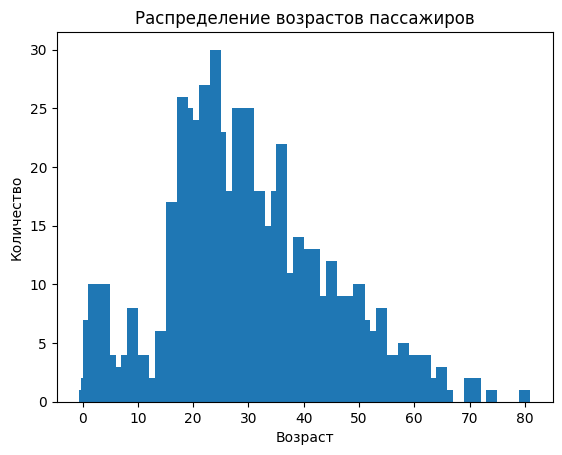

In [2]:
import matplotlib.pyplot as plt
age_counts = df['Age'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, width=2)
plt.title('Распределение возраcтов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

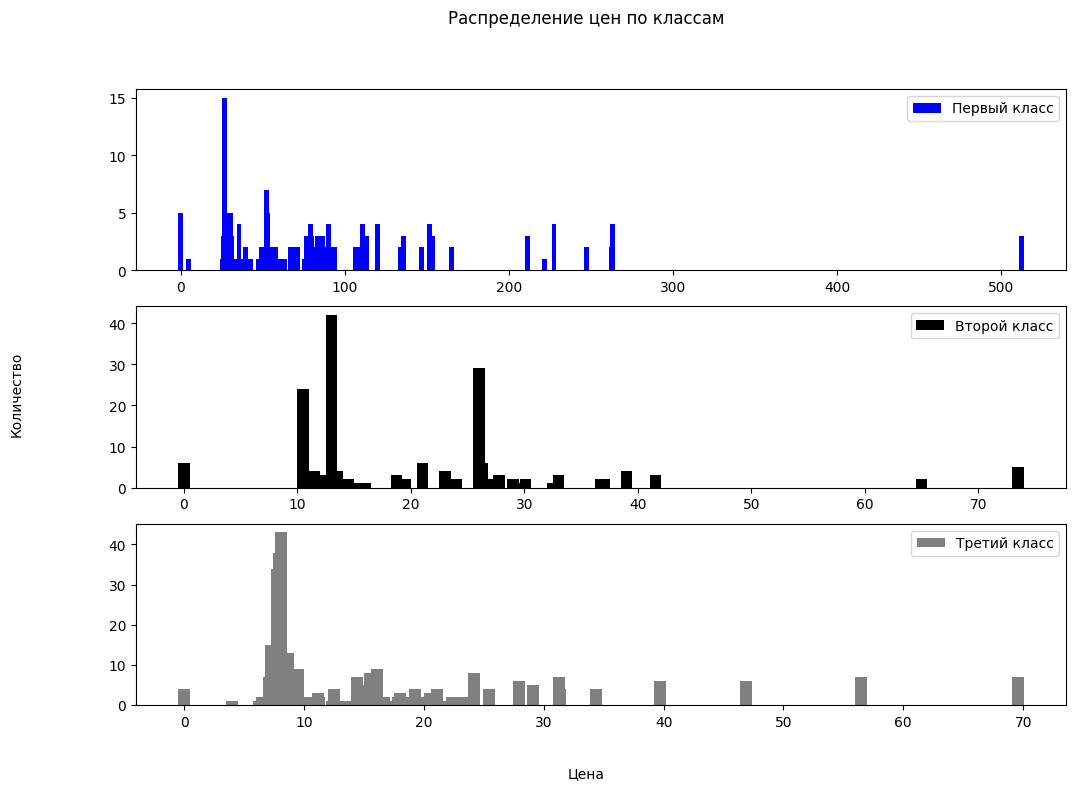

In [61]:
first_class = df[df['Pclass'] == 1]
second_class = df[df['Pclass'] == 2]
third_class = df[df['Pclass'] == 3]

cost_of_first_class = first_class['Fare'].value_counts().sort_index()
cost_of_second_class = second_class['Fare'].value_counts().sort_index()
cost_of_third_class = third_class['Fare'].value_counts().sort_index()

fig, ax = plt.subplots(nrows=3, figsize=(12, 8))

ax[0].bar(cost_of_first_class.index, cost_of_first_class.values, label='Первый класс', color='blue', width = 3)
ax[1].bar(cost_of_second_class.index, cost_of_second_class.values, label='Второй класс', color='black', width = 1)
ax[2].bar(cost_of_third_class.index, cost_of_third_class.values, label='Третий класс', color='gray', width = 1)

fig.suptitle('Распределение цен по классам')
fig.text(0.5, 0.02, 'Цена', ha='center')
fig.text(0.02, 0.5, 'Количество', va='center', rotation='vertical')

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()

3. Постройте зависимость цены от возраста пассажира

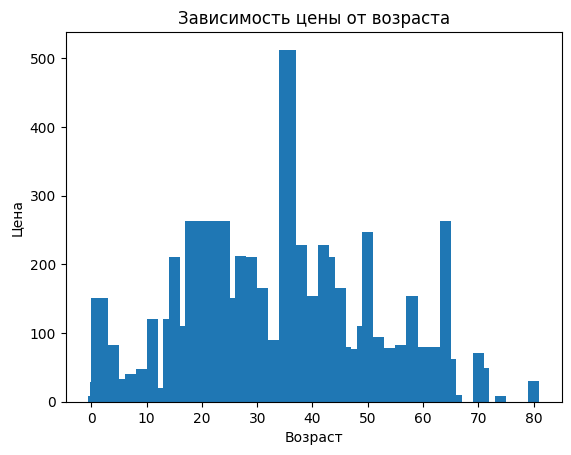

In [49]:
plt.bar(df['Age'], df['Fare'], width=2)

plt.title('Зависимость цены от возраста')
plt.xlabel('Возраст')
plt.ylabel('Цена')

plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

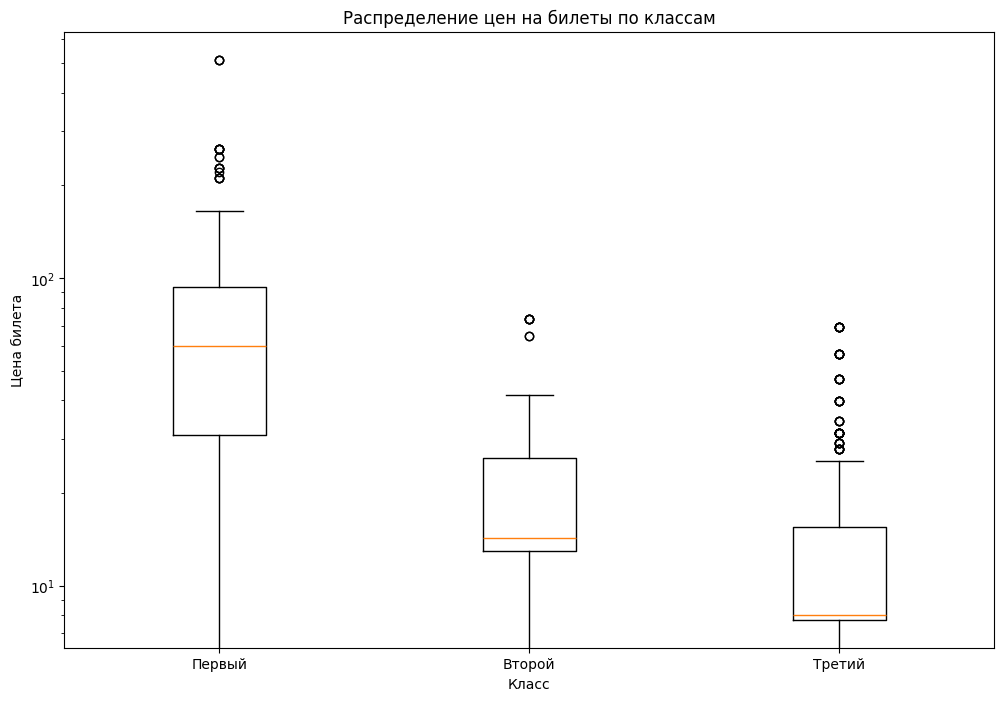

In [3]:
plt.figure(figsize=(12, 8))
plt.boxplot(df.groupby('Pclass')['Fare'].apply(list), tick_labels=['Первый', 'Второй', 'Третий'])

plt.title('Распределение цен на билеты по классам')
plt.xlabel('Класс')
plt.ylabel('Цена билета')
plt.yscale('log')

plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

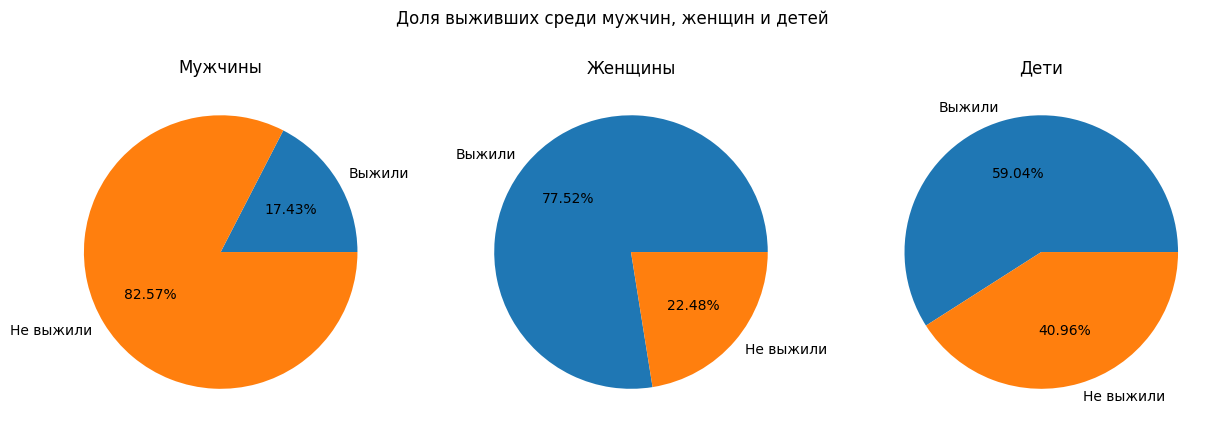

In [14]:
men = df[(df['Sex'] == 'male') & (df['Age'] >= 16)]
women = df[(df['Sex'] == 'female') & (df['Age'] >= 16)]
kids = df[df['Age'] < 16]

labels = ['Мужчины', 'Женщины', 'Дети']
people = [men, women, kids]

plt.figure(figsize=(15, 5)) 

for i in range(3): 
    plt.subplot(1, 3, i + 1)  
    plt.pie(
        (people[i]['Survived'].mean(), 1 - people[i]['Survived'].mean()),
        labels=["Выжили", "Не выжили"],
        autopct='%1.2f%%',
    )
    plt.title(labels[i])

plt.suptitle("Доля выживших среди мужчин, женщин и детей")
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

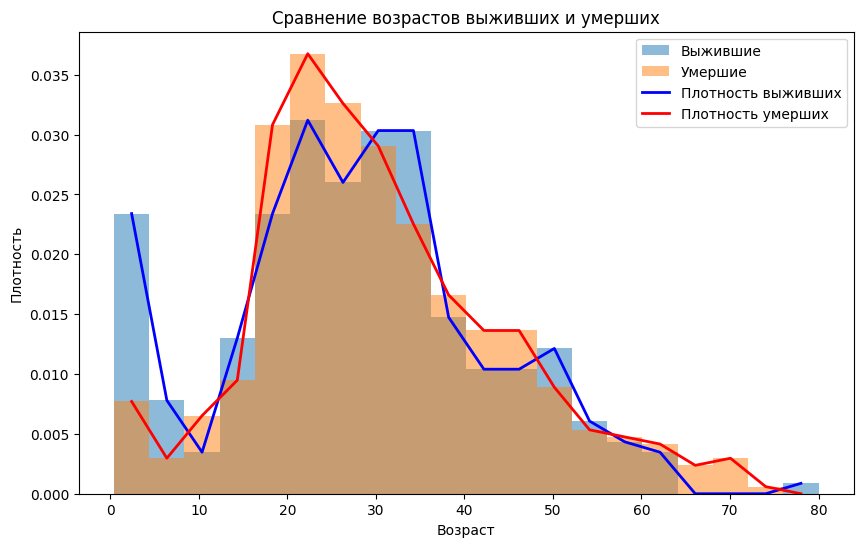

In [13]:
survived_ages = df.loc[df['Survived'] == 1, 'Age']
died_ages = df.loc[df['Survived'] == 0, 'Age']

fig, ax = plt.subplots(figsize=(10, 6))

_, bins, _ = ax.hist(survived_ages, bins=20, density=True, alpha=0.5, label='Выжившие')
_, _, _ = ax.hist(died_ages, bins=bins, density=True, alpha=0.5, label='Умершие')

survived_density = np.histogram(survived_ages, bins=bins, density=True)[0]
died_density = np.histogram(died_ages, bins=bins, density=True)[0]

x = (bins[:-1] + bins[1:]) / 2

ax.plot(x, survived_density, color='blue', linewidth=2, label='Плотность выживших')
ax.plot(x, died_density, color='red', linewidth=2, label='Плотность умерших')

ax.set_xlabel('Возраст')
ax.set_ylabel('Плотность')
ax.set_title('Сравнение возрастов выживших и умерших')
ax.legend()
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

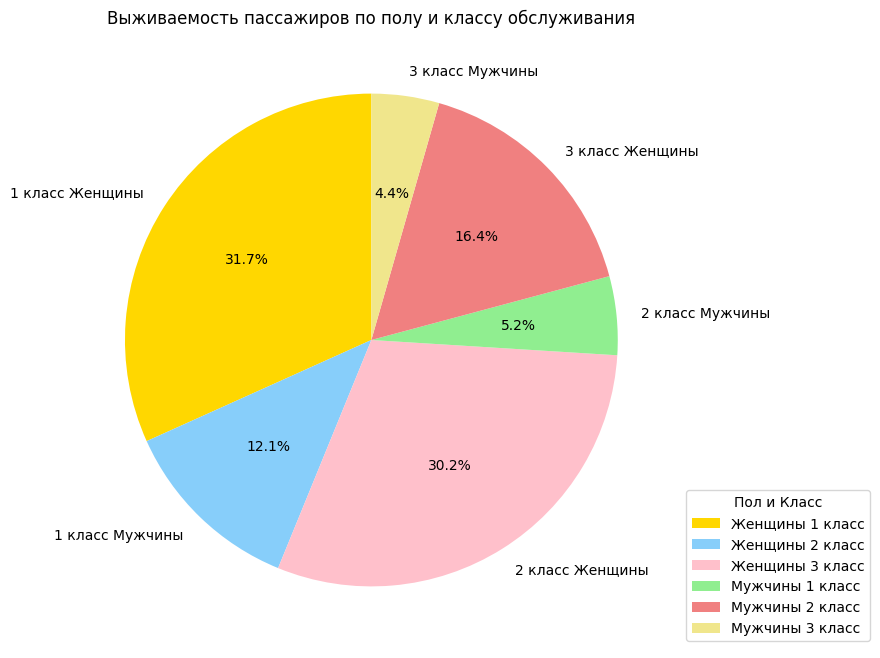

In [53]:
survival_stats = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

pclass_1_women = survival_stats.loc[1, 'female']
pclass_1_men = survival_stats.loc[1, 'male']
pclass_2_women = survival_stats.loc[2, 'female'] 
pclass_2_men = survival_stats.loc[2, 'male']
pclass_3_women = survival_stats.loc[3, 'female']
pclass_3_men = survival_stats.loc[3, 'male']

colors = ['gold', 'lightskyblue', 'pink', 'lightgreen', 'lightcoral', 'khaki']

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie([pclass_1_women, pclass_1_men, 
                                   pclass_2_women, pclass_2_men, 
                                   pclass_3_women, pclass_3_men],
                                  labels=[f'1 класс Женщины',
                                         f'1 класс Мужчины',
                                         f'2 класс Женщины',
                                         f'2 класс Мужчины',
                                         f'3 класс Женщины',
                                         f'3 класс Мужчины'],
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90)

plt.title('Выживаемость пассажиров по полу и классу обслуживания')
plt.legend(wedges, [f"Женщины {label}" for label in ['1 класс', '2 класс', '3 класс']] + 
                  [f"Мужчины {label}" for label in ['1 класс', '2 класс', '3 класс']],
           title="Пол и Класс",
           loc="lower left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()